In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle

In [6]:
# reading the dataset
file_path = "D:/AI Project/galton-stata11.dta"
df = pd.read_stata(file_path)

Epoch 1/100


C:\Users\Muhammad Noman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3316.1646 - val_loss: 1375.0265
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 936.8188 - val_loss: 79.5218
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.0786 - val_loss: 34.0170
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.5408 - val_loss: 12.2658
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.2092 - val_loss: 13.3292
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6367 - val_loss: 12.2012
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5846 - val_loss: 12.3491
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0731 - val_loss: 12.2738
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.7613 - val_loss: 12.3291
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7354 - val_loss: 12.3373
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.4859 - val_loss: 12.3198
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

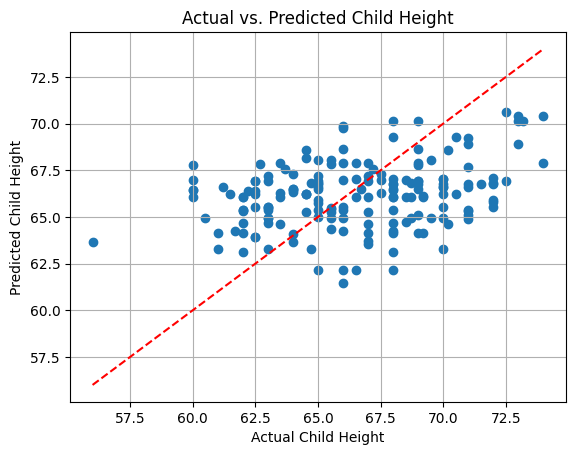

In [10]:
X = df[['father', 'mother']].values

# Target variable: Child's height
y = df['height'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for predicting the child's height
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
y_pred = model.predict(X_test)

# # Plot the training and validation loss over epochs
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Plot the predicted vs. actual child heights
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.title('Actual vs. Predicted Child Height')
plt.grid(True)
plt.show()


In [11]:
def is_blood_group_possible(parent1_blood_group, parent2_blood_group, child_blood_group):
    possible_combinations = {
        ("O+", "O+"): {"O+", "O-"},
        ("O+", "O-"): {"O+", "O-"},
        ("O+", "A+"): {"O+", "O-", "A+", "A-"},
        ("O+", "A-"): {"O-", "A-"},
        ("O+", "B+"): {"O+", "O-", "B+", "B-"},
        ("O+", "B-"): {"O-", "B-"},
        ("O+", "AB+"): {"A+", "B+", "AB+", "AB-"},
        ("O+", "AB-"): {"A-", "B-", "AB-"},
        ("O-", "O-"): {"O-"},
        ("O-", "A+"): {"O-", "A-"},
        ("O-", "A-"): {"O-", "A-"},
        ("O-", "B+"): {"O-", "B-"},
        ("O-", "B-"): {"O-", "B-"},
        ("O-", "AB+"): {"O-", "A-", "B-", "AB-"},
        ("O-", "AB-"): {"O-", "A-", "B-", "AB-"},
        ("A+", "A+"): {"O+", "O-", "A+", "A-"},
        ("A+", "A-"): {"O-", "A-"},
        ("A+", "B+"): {"O+", "O-", "A+", "A-", "B+", "B-", "AB+", "AB-"},
        ("A+", "B-"): {"O-", "A-", "B-", "AB-"},
        ("A+", "AB+"): {"A+", "B+", "AB+", "AB-"},
        ("A+", "AB-"): {"A-", "B-", "AB-"},
        ("A-", "A-"): {"O-", "A-"},
        ("A-", "B+"): {"O-", "A-", "B-", "AB-"},
        ("A-", "B-"): {"O-", "A-", "B-", "AB-"},
        ("A-", "AB+"): {"O-", "A-", "B-", "AB-"},
        ("A-", "AB-"): {"O-", "A-", "B-", "AB-"},
        ("B+", "B+"): {"O+", "O-", "B+", "B-"},
        ("B+", "B-"): {"O-", "B-"},
        ("B+", "AB+"): {"O+", "O-", "B+", "B-", "AB+", "AB-"},
        ("B+", "AB-"): {"O-", "B-", "AB-"},
        ("B-", "B-"): {"O-", "B-"},
        ("B-", "AB+"): {"O-", "B-", "AB-"},
        ("B-", "AB-"): {"O-", "B-", "AB-"},
        ("AB+", "AB+"): {"O+", "O-", "A+", "A-", "B+", "B-", "AB+", "AB-"},
        ("AB+", "AB-"): {"O-", "A-", "B-", "AB-"}
    }

    possible_child_blood_groups = possible_combinations.get((parent1_blood_group, parent2_blood_group))

    if possible_child_blood_groups is None:
        return False

    return child_blood_group in possible_child_blood_groups

# Example usage:
parent1_blood_group = input("Enter parent 1's blood group: ").upper()
parent2_blood_group = input("Enter parent 2's blood group: ").upper()
child_blood_group = input("Enter child's blood group: ").upper()

result = is_blood_group_possible(parent1_blood_group, parent2_blood_group, child_blood_group)
print("Child's blood group is possible:", result)

Enter parent 1's blood group:  O+
Enter parent 2's blood group:  A+
Enter child's blood group:  O-


Child's blood group is possible: True
